# <p style="text-align: center;">Similitud entre Productos</p>

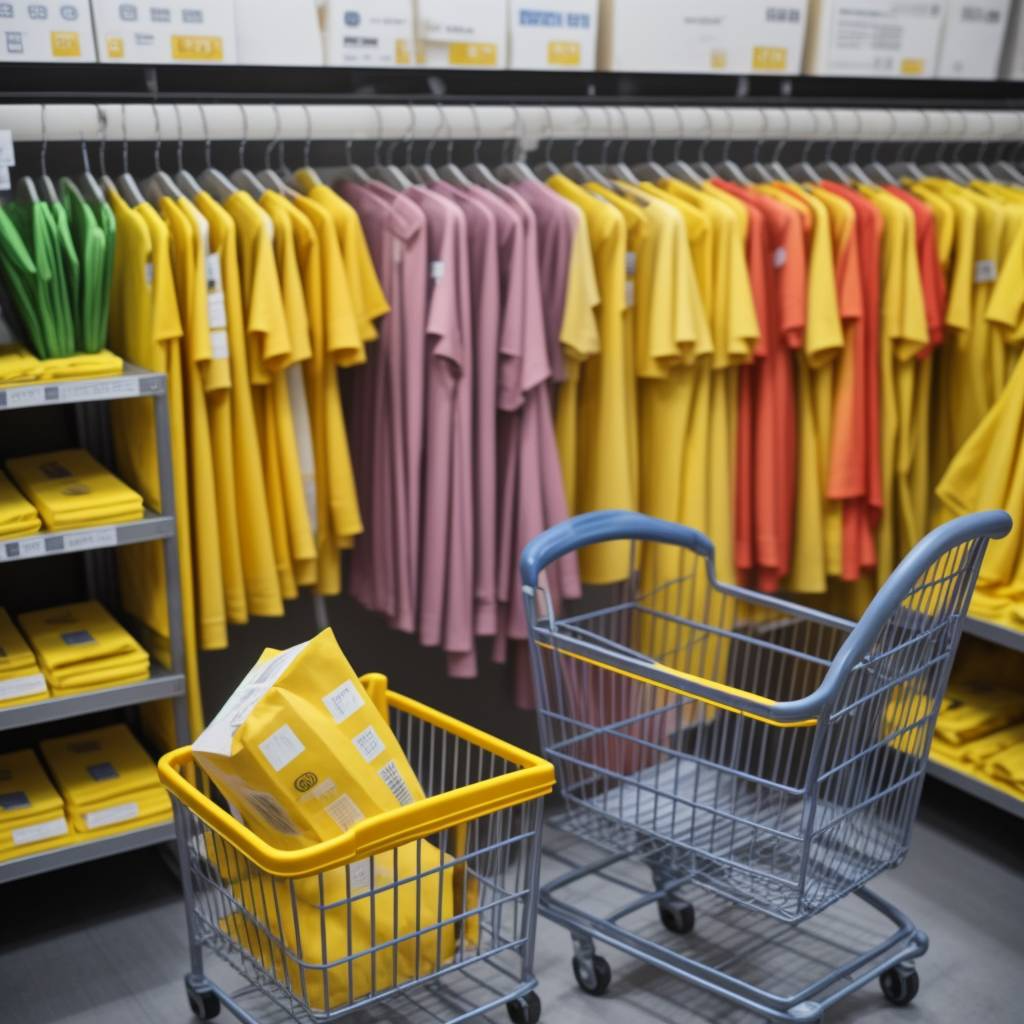


La similitud entre productos puede ser una oportunidad en la cual puede sacar provecho tanto el comprador como Mercado Libre en su plataforma siempre que se identifiquen de manera apropiada. Para un usuario puede facilitar su decisión de compra al hacer comparables los mismos productos, o aquellos con un grado de similaridad alta. En cuanto a la página e información que esto aporta a Mercado Libre se pueden, por ejemplo proponer estrategias para fijar un rango de precios en productos que se sabe son iguales y así mismo identificar aquellos que no como posibles fallos en la publicación del vendedor.

Para llevar a cabo esta importante labor, en el reto contamos con dos conjuntos, uno llamado items_titles con más de 30mil nombres de productos para Mercado Libre Brasil. Por otra parte, para el conjunto de items_titles, con cerca de 10mil registros 
es sobre el cual se quiere generar el entregable donde se encuentren todas sus parejas de productos ordenadas por score de similaridad.

La forma más eficiente de llevar a cabo una comparación entre dos cadenas de textos es a través de los **embeddings**, los cuales en pocas palabras convierten la información relevante del texto en vectores de números que permiten realizar operaciones matemáticas entre sí, como lo es el método de **similitud del coseno** para identificar cercanías semánticas entre sí. 

Entrenar y construir un modelo de este tipo requiere de un esfuerzo y recurso computacional grande, que por fortuna ya fueron realizados por grandes empresas y puestos a disposición para el uso en este tipo de casos. Lo anterior significa, que probaremos con modelos ya existentes y validados directamente en el conjunto de test, que al momento de generar las combinaciones de parejas ya contaría con cerca de 500 millones de registros en sus filas.

Esta técnica nos permite optimizar esfuerzos y recursos computacionales, garantizando unos resultados consistentes. Vamos a realizarlo:

In [1]:
''''
!pip install itables
!pip install -U sentence-transformers
!pip3 install seaborn
!pip install absl-py
!pip install tensorflow
!pip install tensorflow_hub


In [2]:
from itables import init_notebook_mode
import pandas as pd
import numpy as np
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns


init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [3]:
# Importar y ver un poco del conjunto grande
items_titles = pd.read_csv ("C:/Users/Garzonm1/Desktop/Teste Te╠ücnico - DS/items_titles.csv")

In [4]:
items_titles

ITE_ITEM_TITLE
0      Tênis Ascension Posh Masculino - Preto E Verme...
1      Tenis Para Caminhada Super Levinho Spider Corr...
2      Tênis Feminino Le Parc Hocks Black/ice Origina...
3      Tênis Olympikus Esportivo Academia Nova Tendên...
4      Inteligente Led Bicicleta Tauda Luz Usb Bicicl...
...                                                  ...
29995  Tênis Vans Old Skool I Love My Vans - Usado - ...
29996                Tênis Feminino Preto Moleca 5296155
29997  Tenis Botinha Com Pelo Via Marte Original Lanç...
29998  Tênis Slip On Feminino Masculino Original Sapa...
29999  Bicicleta Nathor Rosa Infantil Sem Pedal Balan...

[30000 rows x 1 columns]

In [5]:
# Importar el conjunto donde vamos a implementar los modelos
items_titles_test = pd.read_csv ("C:/Users/Garzonm1/Desktop/Teste Te╠ücnico - DS/items_titles_test.csv")

In [6]:
items_titles_test.size

10000

In [19]:
items_titles_test

ITE_ITEM_TITLE
0      Tênis Olympikus Esporte Valente - Masculino Kids
1     Bicicleta Barra Forte Samy C/ 6 Marchas Cubo C...
2          Tênis Usthemp Slip-on Temático - Labrador 2
3           Tênis Casual Feminino Moleca Tecido Tie Dye
4           Tênis Star Baby Sapatinho Conforto + Brinde
...                                                 ...
9995               Chuteira Futsal Oxn Velox 3 Infantil
9996  Sapatenis Casual Masculino Estiloso 24horas Co...
9997          Tênis Feminino Infantil Molekinha Tie Dye
9998  Tênis Feminino Leve Barato Ganhe 1 Colchonete ...
9999  Tênis Polo Ralph Lauren Modelo Cantor Low Bran...

[10000 rows x 1 columns]

### Vamos a hacerlo con 2 métodos 

- Sentence transformers: Aplican redes neuronales (BERT) para incrustar oraciones en vectores que facilitan la identificación eficiente de títulos similares mediante la comparación de su contenido semántico codificado.

- Universal sentence encoder: Transforma oraciones en vectores densos, utilizando un entrenamiento profundo y diverso que capta matices lingüísticos, lo que lo hace ideal para identificar títulos parecidos incluso con variaciones sutiles en el lenguaje.



## Método 1 - Sentence Transformers

Se escogió el modelo "paraphrase-multilingual-MiniLM-L12-v2" por ser aquel con mejor desempeño que aplicara para **portugués**, idioma en el que se encuentran los datos que acabamos de observar.

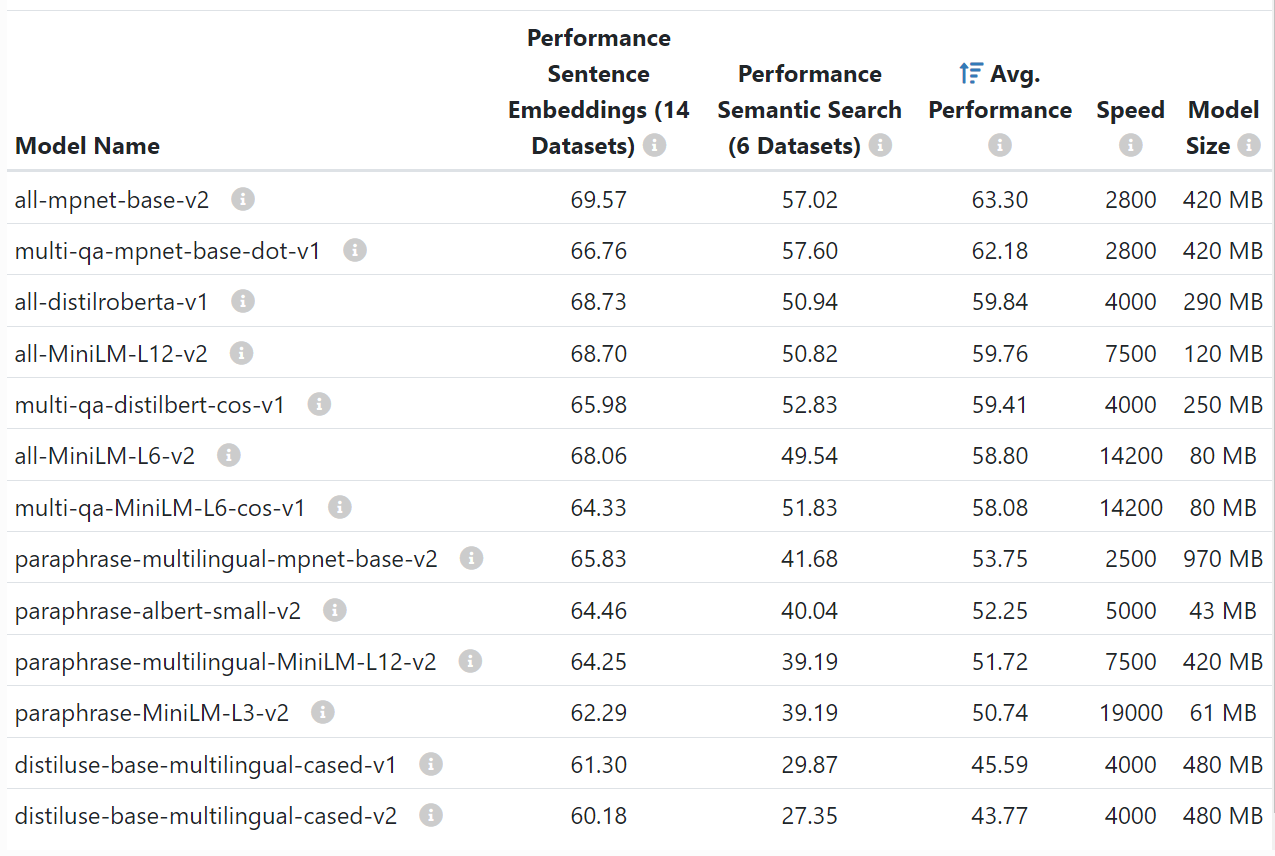

In [8]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  #multi-language model

In [9]:
#Convertir los items a la lista para luego hacer el embedding del título
items = items_titles_test['ITE_ITEM_TITLE'].values.tolist()

In [10]:
embedding = model.encode(items, convert_to_tensor=False)
embedding.shape

(10000, 384)

In [11]:
cosine_scores = util.cos_sim(embedding, embedding)

# Transformar el cosine similarity de -1 a 1 a un rango de 0 a 1
cosine_similarity_normalized = 0.5 * (cosine_scores + 1)

#Almacenar los resultados
result_list = []

#Recorrer la lista de items comparando pares de productos entre sí
for i, v1 in enumerate(items):
    for j, v2 in enumerate(items):
        if i >= j:
            continue
        item1 = v1
        item2 = v2
        score = cosine_similarity_normalized[i][j].item()
        result_list.append((item1, item2, score))

# Crear DataFrame de resultados
df = pd.DataFrame(result_list, columns=['item1', 'item2', 'score'])

# Ordenar por score
df_menores = df.sort_values(by='score', ascending=True).reset_index(drop=True)


In [12]:
df_menores.head()

item1  \
0  Sapatos Mulheres Chinelos Fechados Plush Home ...   
1              Tênis Puma Suede Crush Studs Original   
2  Sapato Casual Mule Babuche Masculino (a Pronta...   
3  Tênis Usthemp Spice Temático -  Labrador Choc...   
4  Tênis Usthemp Folks Vegano Casual Art Love Eng...   

                                               item2     score  
0                  Lebron 11 Elite Se 'championship'  0.360770  
1                                         Bike Speed  0.384839  
2     Smart Tv 8k LG Led 65 Com Ips Nanocell  Wi-fi   0.386082  
3  Energia Solar Cronômetro Bicicleta Computador ...  0.389537  
4  Televisão Samsung  Led 50   Hdmi Internet Com ...  0.390151

In [13]:
# Generar el DataFrame de mayor a menor en similaridad
similar_items_test = df.sort_values(by='score', ascending=False).reset_index(drop=True)

In [14]:
similar_items_test.head(10)

item1  \
0        Mountain Bike 29 Dropp 27v Freio Hidraulico   
1  Tv Portátil Tomate Mtm-808 Led  8 Polegadas 10...   
2     Sapatenis Masculino Da Polo Lançamento 30% Off   
3                                     Tênis Slip On    
4                 Tênis Converse All Star Cano Alto    
5  Sapatênis Tênis Masculino Couro Legítimo Cano ...   
6      Tênis Mizuno Wave Prophecy 6 -  Ref***0000039   
7      Tênis Mizuno Wave Prophecy 6 -  Ref***0000057   
8      Tênis Mizuno Wave Prophecy 6 -  Ref***0000039   
9  Tênis Mizuno Wave Prophecy 6 -  Refff***000552354   

                                               item2     score  
0       Mountain Bike 29  Dropp 27v Freio Hidraulico  1.000000  
1  Tv Portátil Tomate Mtm-808 Led 8 Polegadas 100...  1.000000  
2    Sapatenis Masculino Da Polo Lançamento 30% Off   1.000000  
3                                      Tênis Slip On  1.000000  
4                  Tênis Converse All Star Cano Alto  1.000000  
5  Sapatênis Tênis Masculino  Couro Legítimo Cano...  1.000000  
6      Tênis Mizuno Wave Prophecy 6 -  Ref***0000057  0.999789  
7      Tênis Mizuno Wave Prophecy 6 -  Ref***0000054  0.999721  
8      Tênis Mizuno Wave Prophecy 6 -  Ref***0000054  0.999683  
9  Tênis Mizuno Wave Prophecy 6 -  Refff***000555...  0.999544

In [ ]:
# Exportar csv 



# Modelo 2 - Universal Sentence Encoder

In [20]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

def embed(input):
  return model(input)

In [25]:
titles_list = items_titles_test['ITE_ITEM_TITLE'].tolist()
titles_list = titles_list[:3000]  

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(titles_list)


In [26]:
def compare_pairs(labels, features):
    corr = np.inner(features, features)
    comparisons = []

    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            comparisons.append({
                'item1': labels[i],
                'item2': labels[j],
                'score': corr[i, j]
            })

    return pd.DataFrame(comparisons)

def run_and_compare(messages_):
    message_embeddings_ = embed(messages_)
    return compare_pairs(messages_, message_embeddings_)


In [27]:
df_comparisons = run_and_compare(titles_list)
df_comparisons = df_comparisons.sort_values(by='score', ascending=False).reset_index(drop=True)

In [28]:
df_comparisons

item1  \
0        Tv Portátil Tomate Mtm-808 Led  8 Polegadas 10...   
1        Tênis Fila Racer For All Masculino Corrida - C...   
2                      Tenis Dg Porto Preto Tigre T.elaine   
3              Tênis Mizuno Wave Prophecy 6 - Ref***000017   
4          Tenis Menina Infantil  Feminino Escola Limitado   
...                                                    ...   
4498495                                        Tênis Flora   
4498496  Tênis Oakley Halftrack 365  New Khaki  100% Or...   
4498497  Tênis Slip On Petite Jolie Delicado Sneak Pj30...   
4498498                                      Sapatonike123   
4498499                         New Balance Running Course   

                                                     item2     score  
0        Tv Portátil Tomate Mtm-808 Led 8 Polegadas 100...  1.000000  
1        Tênis Fila Racer For All Feminino Corrida - Ca...  0.961831  
2                     Tenis Dg Porto Preto Tigre T.antonio  0.961428  
3            Tênis Mizuno Wave Prophecy 6 -  Ref***0000039  0.960515  
4         Tenis Menina Infantil  Feminino Escola Fenomenal  0.958409  
...                                                    ...       ...  
4498495        Dunk Low X Nba 75 Anniversary Brooklyn Nets -0.183679  
4498496                                      Sapatonike123 -0.190433  
4498497  Tv 32  Lcd Led Tc-32a400b, Usb - Panasonic -  ... -0.197059  
4498498  Tênis New Balance Trail Running 801 V1 Classic... -0.212897  
4498499  Sapatenis Masculino Pegada Nobuck Oil Masculin... -0.218009  

[4498500 rows x 3 columns]

Usando este método, se excedió la capacidad computacional al usar los 10 mil registros que se encuentran en train, sin embargo se ejecutó para los primeros 3mil registros con el fin de observar que arroja unos resultados similares a los del primer modelo mencionado y que a simple vista parecen tener mucho sentido.

# Conclusiones y Recomendaciones


- Si bien los modelos aplicados ya están validados y entrenados, con el objetivo de hacerlos más específicos a nuestro casi de uso se recomienda buscar la manera de validar los resultados (ej: si se va a mostrar en el marketplace, boton manito arriba si el producto se parece a lo que está buscando) y de esta manera hacer un "Fine Tuning" del modelo que se ajuste a los productos en Mercado Libre.

- Para mejorar el rendimiento computacional, implementar metodologías como Árboles KD que permiten hacer la búsqueda más eficiente reduciendo el espacio de búsqueda en sistemas de recomendación, no comparando con los millones de productos sino con los más cercanos en su partición.

- Complementar la información de los títulos de los productos con adicional como las categorías que fueron mencionadas, o las imágenes usadas en la publicación, para unirlos y usar modelos que combinan imagen y texto como lo es por ejemplo **clip-ViT-B-32-multilingual-v1** que además de funcionar para múltiples idiomas incluido el portugués, es capaz de identificar relaciones entre las imágenes y el texto generando resultados más robustos.